In [6]:
%load_ext autoreload
%autoreload 2
import numpy as np
from astropy import units as u
import emcee
from matplotlib import pyplot as plt

from load_galweight_data import load_clusters
from cluster import temp_from_vdisp
from statistics_functions import log_likelihood, chi_squared

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
# get dataset
clusters, variances = load_clusters(nrows=20)

In [9]:
T_data = [c.baryon_temp for c in clusters]
T_data

[<Quantity 1.13369052e-05 GeV>,
 <Quantity 8.96643311e-06 GeV>,
 <Quantity 9.07989976e-06 GeV>,
 <Quantity 8.10745427e-06 GeV>,
 <Quantity 7.41285088e-06 GeV>,
 <Quantity 8.20368656e-06 GeV>,
 <Quantity 8.22529573e-06 GeV>,
 <Quantity 7.72504935e-06 GeV>,
 <Quantity 7.33483838e-06 GeV>,
 <Quantity 6.21106042e-06 GeV>,
 <Quantity 7.48240004e-06 GeV>,
 <Quantity 7.2500303e-06 GeV>,
 <Quantity 7.74834976e-06 GeV>,
 <Quantity 8.05491993e-06 GeV>,
 <Quantity 5.92439129e-06 GeV>,
 <Quantity 5.61144568e-06 GeV>,
 <Quantity 5.38610788e-06 GeV>,
 <Quantity 3.24632308e-06 GeV>,
 <Quantity 4.88330641e-06 GeV>,
 <Quantity 5.85577809e-06 GeV>]

In [10]:
#s0_test = -20
#m_chi = 1e-4 * u.GeV
p0=[-20, -4]
T_pred = [c.pred_T_b(p0) for c in clusters]
T_pred

[<Quantity 1.07807382e-05 GeV>,
 <Quantity 9.61567765e-06 GeV>,
 <Quantity 9.56385503e-06 GeV>,
 <Quantity 8.95588292e-06 GeV>,
 <Quantity 9.91662006e-06 GeV>,
 <Quantity 6.92299212e-06 GeV>,
 <Quantity 9.37794712e-06 GeV>,
 <Quantity 7.11682618e-06 GeV>,
 <Quantity 7.16976995e-06 GeV>,
 <Quantity 9.38589008e-06 GeV>,
 <Quantity 8.76434586e-06 GeV>,
 <Quantity 8.54963466e-06 GeV>,
 <Quantity 9.05639864e-06 GeV>,
 <Quantity 8.3358258e-06 GeV>,
 <Quantity 7.85923906e-06 GeV>,
 <Quantity 7.6455625e-06 GeV>,
 <Quantity 8.25803179e-06 GeV>,
 <Quantity 8.28379449e-06 GeV>,
 <Quantity 8.38925954e-06 GeV>,
 <Quantity 8.12220655e-06 GeV>]

In [11]:
chi_squared(T_pred, T_data, variances)

<Quantity 6075.88232632>

In [12]:
log_likelihood(p0, T_data, variances, clusters)

<Quantity -3037.94116316>

In [26]:
# initialize mcmc
ndim, nwalkers = 1, 5
log_sigma0 = np.random.uniform(low=-40, high=-10, size=(nwalkers, ndim)).astype(dtype=np.float128)
log_sigma0

#mchi = np.ones(shape=(nwalkers, ndim))*1e-4*u.GeV
p0=np.zeros((nwalkers, ndim ))
p0[:,0] = log_sigma0.reshape((5,))
#p0[:,1]= mchi.reshape((5,))
#p0

In [27]:
# put m_chi=1e-4 for all 
m_chi=-4
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_likelihood, args=[T_data, variances, clusters, m_chi])

In [28]:
state = sampler.run_mcmc(log_sigma0, 100, progress=True)
sampler.reset()

You must install the tqdm library to use progress indicators with emcee


In [29]:
sampler.run_mcmc(state, 500, progress=True)

You must install the tqdm library to use progress indicators with emcee


State([[-19.76272129]
 [-19.76117343]
 [-19.7670398 ]
 [-19.75167058]
 [-19.75212047]], log_prob=[-1315.69454114 -1315.30718916 -1317.39153095 -1315.45275526
 -1315.34881136], blobs=None, random_state=('MT19937', array([3226325266, 3520196391, 2989742274, 3088546796, 2887122468,
       1915101574, 1986608220, 3630647728, 1010956689, 3890963171,
       3014111601, 2873966058,   52669389, 4033378116, 1380238321,
       3916893322, 3540275666, 1484209479,  811752890, 2344215648,
       2696468556, 3079064944,  336363435,  675885255, 1215270603,
       3753809035,  774033438, 3860261256,  838979992,  268842631,
       2746391661, 1698861532, 1284332961, 1400322859, 2462001889,
       3632880819,  300467101, 1003936576, 1606228730, 3168489512,
       1791195432, 1195583494, 2656907781, 1840283876,  809407437,
       3203255450, 3083469498, 3494221914, 1841519125, 1490912674,
       2950553936,  295133534, 1589413450, 3106314858, 4007061761,
       3283848236, 2326462407, 1336248117,  654989

In [30]:
samples = sampler.get_chain(flat=True)
samples

array([[-19.75517433],
       [-19.74703605],
       [-19.75515425],
       ...,
       [-19.7670398 ],
       [-19.75167058],
       [-19.75212047]])

Text(0.5, 0, 'log(sigma0)')

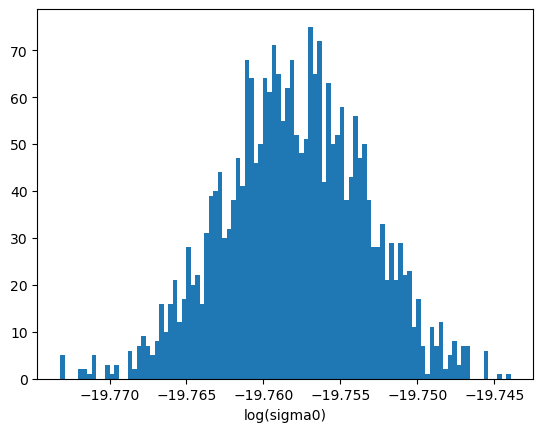

In [31]:
plt.hist(samples, bins=100)
plt.xlabel('log(sigma0)')

In [32]:
np.median(samples)

-19.75800856120255